In [ ]:
pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [ ]:
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: xlabel='date', ylabel='meantemp'>

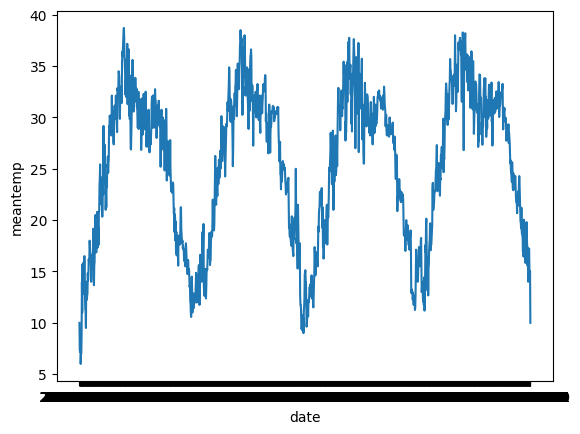

In [ ]:
sns.lineplot(x='date',y='meantemp',data=df)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

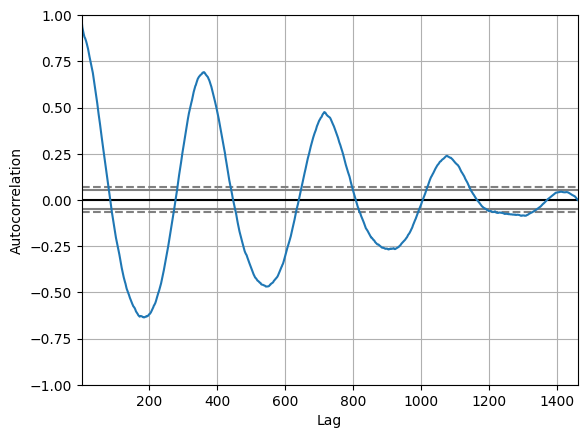

In [ ]:
autocorrelation_plot(df['meantemp'])

The data is corelated from 0-1100
and not corelated from 1100-1400

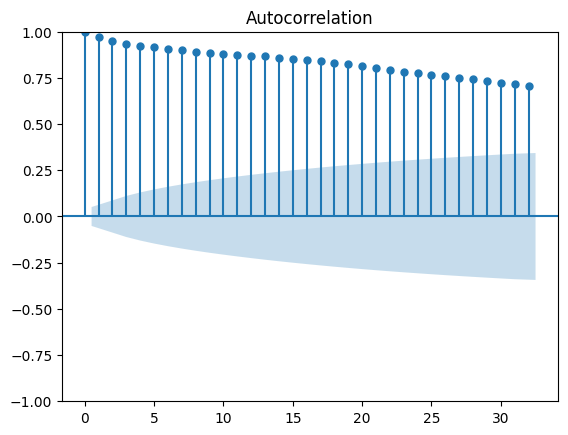

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['meantemp'])
plt.show()

The graph indicates a Decaying Plot

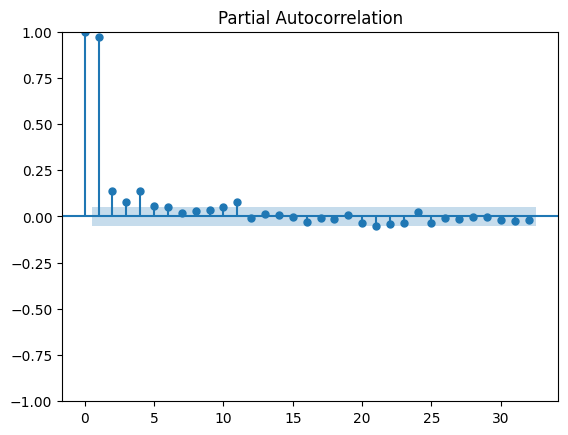

In [ ]:
plot_pacf(df['meantemp'])
plt.show()

Significance Corelation at lag 1 and 2

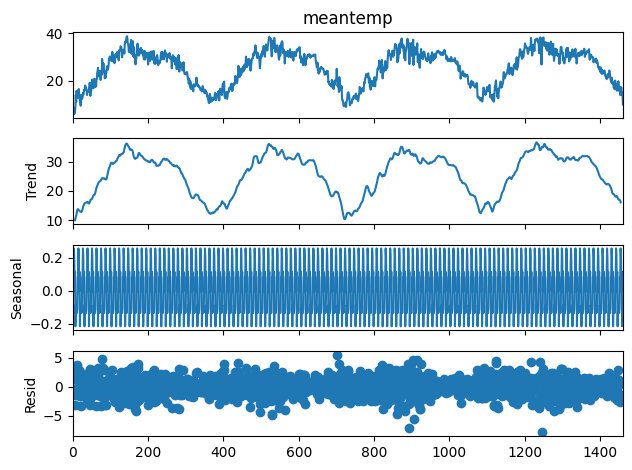

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['meantemp'],model='additive',period=12)
decompose.plot()
plt.show()

Cyclic trend is visible

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.meantemp,autolag = 'AIC')
print("1. ADF: ",dftest[0])
print('2. P-Value: ',dftest[1])
print('3. Num of Lags: ',dftest[2])
print('4. Num of Observations Used and Critical Value calculations : ',dftest[3])
print('5. Critical Values: ')
for key,value in dftest[4].items():
  print('\t',key,':',value)

1. ADF:  -2.0210690559206737
2. P-Value:  0.2774121372301601
3. Num of Lags:  10
4. Num of Observations Used and Critical Value calculations :  1451
5. Critical Values: 
	 1% : -3.4348647527922824
	 5% : -2.863533960720434
	 10% : -2.567831568508802


Since the P-Value is greater that 0.05, this indicates that the data in non-stationary

In [ ]:
df_diff = df['meantemp'].diff(periods=350)
dftest = adfuller(df_diff.dropna(),autolag='AIC')
print("1. ADF: ",dftest[0])
print('2. P-Value: ',dftest[1])
print('3. Num of Lags: ',dftest[2])
print('4. Num of Observations Used and Critical Value calculations : ',dftest[3])
print('5. Critical Values: ')
for key,value in dftest[4].items():
  print('\t',key,':',value)

1. ADF:  -4.005773944880613
2. P-Value:  0.0013805771379326109
3. Num of Lags:  20
4. Num of Observations Used and Critical Value calculations :  1091
5. Critical Values: 
	 1% : -3.436358022565693
	 5% : -2.8641928088747743
	 10% : -2.5681824424400626


The data is differenced and null values are droped.
Since the P-Value is less that 0.05, this indicates that the data in Stationary

In [ ]:
import pmdarima as pmd
model = pmd.auto_arima(df['meantemp'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5543.944, Time=7.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5650.181, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5615.079, Time=0.79 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5602.960, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5648.181, Time=0.07 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5544.946, Time=2.45 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5544.887, Time=1.70 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5545.718, Time=19.14 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5545.695, Time=17.40 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5544.460, Time=0.83 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5546.490, Time=8.32 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=5546.296, Time=5.85 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=5547.925, Time=13.74 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5604.958, Time=1.06 sec
 ARIMA(1,1,0)(1,

Used to find the best model for SARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(df['meantemp'],order=(1,1,1),seasonal_order=(1,0,1,12))
pred = sarima.fit().predict();pred

,predicted_mean
0,0.000000
1,9.999995
2,7.841684
3,7.555284
4,8.665322
...,...
1457,16.702556
1458,17.159179
1459,15.521542
1460,14.752933


Prediction made by the SARIMA model

In [ ]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARED ERROR ",mean_squared_error(df['meantemp'],pred))

MEAN SQUARED ERROR 2.6489140506923645


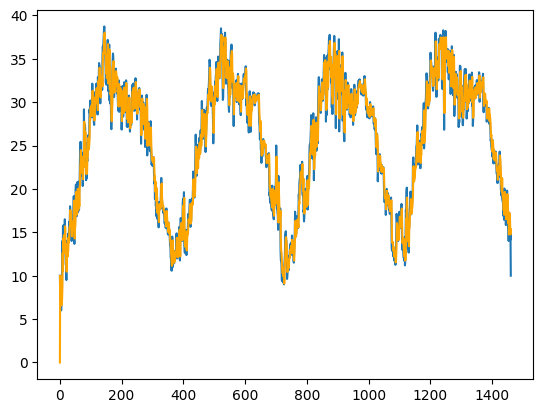

In [ ]:
plt.plot(df['meantemp'])
plt.plot(pred,color='orange')
plt.show()